In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
% matplotlib inline
import matplotlib as plt
import csv
import os
import requests
import tweepy

### Gather: Twitter Archive Enhanced###
**Let's start with gathering the enhanced twitter archive data**

In [2]:
tw_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#let's expand the text column for better readability
pd.set_option('display.max_colwidth', -1)
tw_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [4]:
tw_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [5]:
tw_archive.query('name == "a" or name == "an"').name.count()

62

In [6]:
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
tw_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [8]:
tw_archive[tw_archive.rating_numerator > 20].tweet_id.count()

24

In [9]:
#some ratings are extremely high (max is 2356) and some rating denominators are less than 10

In [10]:
tw_archive[tw_archive.rating_denominator != 10].tweet_id.count()

23

In [11]:
tw_archive[tw_archive.in_reply_to_status_id.notnull()]
#78 instances of reply tweets for which we want to ignore

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547188785154/photo/1,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610513747968/photo/1,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [12]:
tw_archive[(tw_archive.in_reply_to_status_id.notnull()) & (tw_archive.name == 'None')]
#77 instances where such replies have no dog names -- so confirming these are not original tweets and can be deleted

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547188785154/photo/1,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610513747968/photo/1,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [13]:
tw_archive[(tw_archive.rating_numerator > 20) & (tw_archive.in_reply_to_status_id.isnull())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday h

In [14]:
tw_archive[(tw_archive.in_reply_to_status_id.notnull()) & (tw_archive.name != 'None')]
# we can keep these instances: (669353438988365824) along with following tweet ids: 863079547188785154, 856526610513747968, 802265048156610565,
#675870721063669760, 675349384339542016, 674793399141146624, 671729906628341761

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tessa. She is also very pleased after finally meeting her biological father. 10/10 https://t.co/qDS1aCqppv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438988365824/photo/1,10,10,Tessa,None,None,None,None


In [15]:
tw_archive[tw_archive.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [16]:
tw_archive.rating_numerator.isnull().any()
#no missing ratings

False

In [17]:
tw_archive.tweet_id.duplicated().any()
#no duplicated tweets

False

In [18]:
tw_archive.expanded_urls.duplicated().any()

True

In [19]:
df_url = tw_archive[tw_archive.expanded_urls.notna()]
#df.dropna().loc[df['foo'].duplicated()]
df_url[df_url.expanded_urls.duplicated(keep=False)].sort_values(by=['expanded_urls', 'text'])


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
349,831650051525054464,NaN,NaN,2017-02-14 23:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t.co/piiX0ke8Z6 https://t.co/1UHrKcaCiO",NaN,NaN,NaN,"http://www.gofundme.com/bluethewhitehusky,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1",13,10,None,None,None,None,None
204,852936405516943360,NaN,NaN,2017-04-14 17:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t…",8.316501e+17,4.196984e+09,2017-02-14 23:43:18 +0000,"http://www.gofundme.com/bluethewhitehusky,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1",13,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0DvHAMdA4V,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269671505920/photo/1,10,10,None,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0Dv…,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269671505920/photo/1,10,10,None,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://…,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164079423490/photo/1,12,10,Pipsy,None,None,None,None
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://t.co/h9R0EwKd9X,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164079423490/ph

In [20]:
#df[df.expanded_urls.duplicated()].tweet_id.count()
df_url[df_url.expanded_urls.duplicated()].tweet_id.count()

#there appear to be 79 such duplicate records, this looks to be due to retweets/replies

79

In [21]:
df_url[df_url.retweeted_status_id.notna()].tweet_id.count()

180

In [22]:
df_url[df_url.retweeted_status_id.notna()].expanded_urls.duplicated().count()

180

In [23]:
tw_archive[tw_archive.retweeted_status_id.notna()].tweet_id.count()
# there appear to be 181 retweets

181

In [24]:
tw_archive[tw_archive.retweeted_status_id.notna()]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" re

In [25]:
tw_archive[tw_archive.retweeted_status_id.notna()].expanded_urls.duplicated().any()

False

In [26]:
tw_archive[tw_archive.retweeted_status_id.notna()].sort_values(by='expanded_urls')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
204,852936405516943360,NaN,NaN,2017-04-14 17:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t…",8.316501e+17,4.196984e+09,2017-02-14 23:43:18 +0000,"http://www.gofundme.com/bluethewhitehusky,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1",13,10,None,None,None,None,None
180,857062103051644929,NaN,NaN,2017-04-26 02:41:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @AaronChewning: First time wearing my @dog_rates hat on a flight and I get DOUBLE OPEN ROWS. Really makes you think. 13/10 https://t.co/…,8.570611e+17,5.870972e+07,2017-04-26 02:37:47 +0000,https://twitter.com/AaronChewning/status/857061112319234050/photo/1,13,10,None,None,None,None,None
568,802185808107208704,NaN,NaN,2016-11-25 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @ChinoChinako: They're good products, Brent\n\nMug holds drinks; hoodie is comfy af. 13/10 \n\nPuppy Aika h*cking agrees. @dog_rates https:/…",8.000650e+17,2.488557e+07,2016-11-19 19:55:41 +0000,"https://twitter.com/ChinoChinako/status/800065028116385792/photo/1,https://twitter.com/ChinoChinako/status/800065028116385792/photo/1,https://twitter.com/ChinoChinako/status/800065028116385792/photo/1",13,10,None,None,None,None,None
332,832769181346996225,NaN,NaN,2017-02-18 01:50:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @EmilieGambril: 12/10 h*cking excited about my new shirt! @dog_rates https://t.co/zFEfMTaHqU,8.327664e+17,4.871977e+08,2017-02-18 01:39:12 +0000,"https://twitter.com/EmilieGambril/status/832766382198566913/photo/1,https://twitter.com/EmilieGambril/status/832766382198566913/photo/1,https://twitter.com/EmilieGambril/status/832766382198566913/photo/1,https://twitter.com/EmilieGambril/status/832766382198566913/photo/1",12,10,None,None,None,None,None
298,837012587749474308,NaN,NaN,2017-03-01 18:52:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @KennyFromDaBlok: 14/10 h*ckin good hats. will wear daily @dog_rates https://t.co/rHLoU5gS30,8.370113e+17,7.266347e+08,2017-03-01 18:47:10 +0000,"https://twitter.com/KennyFromDaBlok/status/837011344666812416/photo/1,https://twitter.com/KennyFromDaBlok/status/837011344666812416/photo/1",14,10,None,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,"https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1",15,10,None,None,None,None,None
302,836648853927522308,NaN,NaN,2017-02-28 18:46:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @SchafeBacon2016: @dog_rates Slightly disturbed by the outright profanity, but confident doggos were involved. 11/10, would tailgate aga…",8.366481e+17,7.124572e+17,2017-02-28 18:43:57 +0000,https://twitter.com/SchafeBacon2016/status/836648149003485187/photo/1,11,10,None,None,None,None,Non

In [27]:
tw_archive.query('name == "None"').name.count()
#several missing dog names

745

In [28]:
tw_archive.query('rating_numerator < 10')
#883482846933004288 should be 13.5/10
#sampling of other <10 ratings suggests they are legit

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111729840128/photo/1,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313023332352/photo/1,7,10,Herschel,None,None,pupper,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409219559425/photo/1,9,10,Beau,None,None,None,None
599,798682547630837760,NaN,NaN,2016-11-16 00:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…,6.769365e+17,4.196984e+09,2015-12-16 01:27:03 +0000,https://twitter.com/dog_rates/status/676936541936185344/photo/1,8,10,None,None,None,pupper,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882474196992/photo/1,5,10,None,None,None,None,None


In [29]:
tw_archive.query('rating_numerator == 0')
#these two tweets are not valid dog ratings and can be removed

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None


In [30]:
tw_archive.expanded_urls.isna().sum()

59

In [31]:
tw_archive[tw_archive.expanded_urls.isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [32]:
tw_archive.query('tweet_id == 0').tweet_id.count()

0

In [33]:
tw_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [34]:
# Observation: the source values can perhaps be simplified for readability to one of 4 possible values:
# "Twitter for iPhone"
# #Vine - Make a Scene"
# "Twitter Web Client"
# "TweetDeck"

### Assess: Twitter Archive Enhanced ###
**Data Quality**
* dog stage is missing for some rows which are populated with 'None' instead of null (i.e. NaN).  
* At least 62 instances of incorrect dog names (e.g. 'a' or 'an').  These words are all the 3rd word in the tweet as it appears the names were extracted with the assumption all tweets followed the pattern "This is dog_name...".
* several instances (745) of missing dog names which are populated with 'None' instead of null (i.e. NaN).  Quick scan of a few entries show these tweets are not of dogs (but of owners etc.)
* several instances (59) where the expanded url is missing
* timestamp and retweet_timestamp should be of date_time dataype
* there are 181 retweets which can be removed for our purposes (note these instances may overlap with some of the other observed issues)
* 23 instances where rating denominator is not 10 (note these instances may overlap with some of the other observed issues)
* some instances (24) where the rating_numerator is extremely high (>20) (note these instances may overlap with some of the other observed issues)
* inconsistent format for dog names (some start w/ capitals others don't)
* 70 instances of reply tweets to original do posting (additional 7 tweets where reply includes a dog and rating so can keep those)
* 2 instances where rating numerator is zero (valid issue?)
* update source values for clarity

**Non-issues?**
* not clear if the different id columns (e.g. tweet_id, retweet_user_id etc.) should be numbers (e.g. int64 or float 64) as opposed to a string (leading zeros could be stripped?)
* several instances (440) where rating numerator is less than 10 (valid issue?)

**Data Tidiness**
* dog stages should probably be a single column instead of multiple columns
* new dog stages column should be of category datatype
* as we won't be needing retweets, we can remove the related columns


### Gather: Image Predictions ###
**Let's gather image predictions data now**

In [35]:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [36]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
with open('image_preds', mode='wb') as file:
    file.write(response.content)

In [37]:
image_predictions = pd.read_csv('image_preds', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [38]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [39]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [40]:
image_predictions.query('img_num <= 0')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [41]:
image_predictions.query('jpg_url == "None"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [42]:
image_predictions.tweet_id.duplicated().any()

False

In [43]:
image_predictions.jpg_url.duplicated().any()

True

In [44]:
image_predictions.jpg_url.duplicated().sum()

66

In [45]:
image_predictions[image_predictions.jpg_url.duplicated(keep=False)].sort_values(by='jpg_url').head(20)
#these appear to be duplicated images due to retweets

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [46]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


As the name suggests, confidence for prediction 1 is the highest consistently

In [47]:
# Let's take a look at the dog breed predictions
image_predictions.query('p1_dog == True').p1.value_counts().head()

golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
pug                   57 
Name: p1, dtype: int64

In [48]:
image_predictions.query('p2_dog == True').p2.value_counts().head()

Labrador_retriever    104
golden_retriever      92 
Cardigan              73 
Chihuahua             44 
Pomeranian            42 
Name: p2, dtype: int64

In [49]:
image_predictions.query('p3_dog == True').p3.value_counts().head()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
Name: p3, dtype: int64

In [50]:
# Observation: there is inconsistent spelling format for dog breeds 
# The first or second letter capitalized sometimes and sometimes not, however it appears to be consistent between 3 predictions
# Hence, not sure it affects analysis so depending on how many corrections I want to do, may or may not correct

### Assess: Image Predictions ###
**Quality**
* There are 2075 predictions, whereas there are 2356 tweets meaning
* There are 66 instances of duplicate predications whereby both the original tweet and the retweeted image were used

**Tidiness**
* Each row comprises 3 observations (i.e. 3 predictions).  If desired, instead of 9 separate columns for each of 3 dog predictions and associated confidence and accuracy, can collapse into three columns: one column indicating prediction #, another column indicating prediction confidence and accuracy

### Gather: Twitter API ###
**Now we'll gather additional data from the Twitter API**
* retweet count 
* favorite count

In [51]:
#import tweepy -- already did this earlier
#actual keys/secrets/tokens will need to be obfuscated
#code to create an API object that you can use to gather Twitter data.
consumer_key = 'MY CONSUMER KEY'
consumer_secret = 'MY CONSUMER SECRET'
access_token = 'MY ACCESS TOKEN'
access_secret = 'MY ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [52]:
# import json
# import time

# start_time = time.time()
# loop_count = 0

# with open('tweet_json.txt','w', encoding = 'utf8') as outfile:
#     for tweet_id in df.tweet_id:
#         loop_count += 1
#         try:
#             tweet_extend = api.get_status(tweet_id, tweet_mode='extended') # set mode to extended
#             json.dump(tweet_extend._json, outfile)
#             outfile.write('\n') # add a line to separate different json files
#             if loop_count % 100 == 0: # to minimize number of messages, let's only count every 100 loops
#                 print("loop # " + str(loop_count))                
#                 print('trying tweet_id {} now'.format(tweet_id))
#                 elapsed_time = time.time() - start_time
#                 elapsed_time_str = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
#                 print("\nTime elapsed (HH:MM:SS) so far:  " + elapsed_time_str + "\n")            
#         except Exception as e: 
#             print('for tweet_id {} the following error occured: {} '.format(tweet_id, e))
#         pass

# elapsed_time = time.time() - start_time
# elapsed_time_str = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
# print("\nTotal time elapsed (HH:MM:SS):  " + elapsed_time_str + "\n")

In [53]:
import json
tweets = []

tweet_json = open('tweet_json.txt', 'r')

for line in tweet_json:
    tweet = json.loads(line)
    tweets.append(tweet)

In [54]:
import json

tweets = [] #empty list for storing tweet info to be converted to Dataframe after population

with open('tweet_json.txt', 'r') as json_file:
    #data = json.loads(json_file)
    for line in json_file:
        tweet = json.loads(line)
        json_data = {'tweet_id': tweet['id'],  #create dictionary for each tweet's desired fields
        'retweet_count': tweet['retweet_count'], 
        'favorite_count': tweet['favorite_count']}
        tweets.append(json_data) #append fields to list
#after reading all tweets, convert list of dictionaries to a dataframe
tw_api = pd.DataFrame(tweets, columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])
#inspect dataframe
tw_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7966,37191
1,892177421306343426,5913,31993
2,891815181378084864,3909,24092
3,891689557279858688,8115,40511
4,891327558926688256,8799,38741


In [55]:
tw_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
tweet_id          2332 non-null int64
retweet_count     2332 non-null int64
favorite_count    2332 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [56]:
tw_archive.tweet_id.count() - tw_api.tweet_id.count()

24

### Assess: Twitter API Data ###

**Quality**
* There were 24 instances where the twitter API encountered an error retrieving data.  May want to exclude those records when analyzing in combination with twitter archive data

**Tidiness**
* The Twitter API data can be combined with the twitter archive into a single dataframe for easier analysis

## Define ##
**Let's define the fixes we want to implement for the different data quality and tidiness issues**


### Assess: Twitter Archive Enhanced ###
**Data Quality**
* Replace instances of 'None' with NaN for dog stage.
* Replace the 745 instances of 'None' with NaN for missing dog names.
* change timestamp and retweeted_status_timestamp to date_time dataype
* remove the 181 retweets
* Manually correct the roughly 20 extremely high ratings (>20) --> these appear to have extracted the rating incorrectly due to inconsistent tweet text string patterns.
* Manually correct the roughly 20 instances where the rating denominator is not equal to 10 --> these appear to have extracted the rating incorrectly due to inconsistent tweet text string patterns.
* Remove the roughly 70 instances of reply tweets to original posting (additional 7 tweets where reply includes a dog and rating so can keep those)
* Can remove the 2 instances of ratings of zero (0) as those are not for actual dog postings (tweets are about plagiarism and a poor view from the empire state building)
* simply source values for clarity
* (observation) At least 62 instances of incorrect dog names (e.g. 'a' or 'an').  These words are all the 3rd word in the tweet as it appears the names were extracted with the assumption all tweets followed the pattern "This is dog_name...": We don't really have a programmable way to fix this yet so will leave outstanding for now: 
* (observation) several instances (59) where the expanded url is missing: If desired, we can create the expanded url using the tweet_id concatenated to "https://twitter.com/dog_rates/status/"
* (Observation) inconsistent format for dog names (some start w/ capitals others don't): I don't think this will affect our analysis so we may leave as is.

**Non-issues?**
* several instances (440) where rating numerator is less than 10 (valid issue?)

**Data Tidiness**
* Collapse the multiple columns for dog stages into a single column and assign datatype of category to new column
* Drop the retweet columns as we don't need those for our purposes (we will removing retweets)
* Consider dropping the in_reply columns as well (as we have very few such tweet instances)

### Assess: Image Predictions ###
**Data Quality**
* Remove the 66 instances of duplicate predictions (i.e. whereby both the original tweet and the retweeted image were used)
* There are 2075 predictions, whereas there are 2356 tweets in the archive: let's move these extra records to a separate dataframe in case we need them later.  This will ease analysis of the 2075 tweets with predictions

**Data Tidiness**
* For analysis purposes, we can merge the highest confidence dog breed prediction (i.e. p1) and associated confidence p1_conf for instances where it is in fact a dog p1_dog = True, with the twitter archive
* TBD: Each row comprises 3 observations (i.e. 3 predictions).  If desired, instead of 9 separate columns for each of 3 dog predictions and associated confidence and accuracy, can collapse into three columns: one column indicating prediction #, another column indicating prediction confidence and accuracy: not yet clear if this needs to be cleaned up, but if so we could use the Melt function again here.

### Assess: Twitter API Data ###

**Data Quality**
* if desired, after combining with the twitter archive data (see tidiness fix), we'll remove from the original twitter archive the 24 instances where the twitter API encountered an error retrieving data.

**Data Tidiness**
* The Twitter API data can be combined with the twitter archive into a single dataframe for easier analysis

## Clean ##
#### Twitter Archive Enhanced ####

**Data Quality Issue**

1) Replace instances of 'None' with NaN for dog stage.

**Data Tidiness Issue**

1) Collapse the multiple columns for dog stages into a single column and assign datatype of category to new column

In [57]:
tw_archive_clean = tw_archive.copy()

In [58]:
# We loop to replace all the 'None' entries before concatenating the column values
stage = ['doggo','pupper', 'floofer', 'puppo' ]
for i in stage:
        tw_archive_clean[i] = tw_archive_clean[i].replace('None', '')

In [59]:
# Now we collapse the 4 dog stage columns into a single 'stage' column by concatenating the values from previous step
tw_archive_clean['stage'] = tw_archive_clean.doggo.str.cat(tw_archive_clean.pupper).str.cat(tw_archive_clean.floofer).str.cat(tw_archive_clean.puppo)

# Then we replace any empty values with NaN
tw_archive_clean.stage.replace('', np.NaN, inplace=True)

# Next we drop the original 4 dog stage columns
tw_archive_clean.drop(['doggo','pupper', 'floofer', 'puppo'], axis=1, inplace=True)

#Finally we update stage column type to category
tw_archive_clean.stage = tw_archive_clean.stage.astype('category')

In [60]:
#test to confirm changes
tw_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
1505,691793053716221953,NaN,NaN,2016-01-26 01:21:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",We usually don't rate penguins but this one is in need of a confidence boost after that slide. 10/10 https://t.co/qnMJHBxPuo,NaN,NaN,NaN,https://vine.co/v/OTTVAKw6YlW,10,10,None,NaN
1862,675432746517426176,NaN,NaN,2015-12-11 21:51:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Friday. Here's some golden puppers. 12/10 for all https://t.co/wNkqAED6lG,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/675432746517426176/photo/1,https://twitter.com/dog_rates/status/675432746517426176/photo/1,https://twitter.com/dog_rates/status/675432746517426176/photo/1",12,10,None,NaN
1493,692752401762250755,NaN,NaN,2016-01-28 16:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Hello yes could I get one pupper to go please thank you""\nBoth 13/10 https://t.co/kYWcXbluUu",NaN,NaN,NaN,https://twitter.com/dog_rates/status/692752401762250755/photo/1,13,10,None,pupper
350,831552930092285952,NaN,NaN,2017-02-14 17:17:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dutch. He dressed up as his favorite emoji for Valentine's Day. I've got heart eyes for his heart eyes. 13/10 https://t.co/BCbmFYLrse,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831552930092285952/photo/1,13,10,Dutch,NaN
1610,685532292383666176,NaN,NaN,2016-01-08 18:43:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","For the last time, WE. DO. NOT. RATE. BULBASAUR. We only rate dogs. Please only send dogs. Thank you ...9/10 https://t.co/GboDG8WhJG",NaN,NaN,NaN,https://twitter.com/dog_rates/status/685532292383666176/photo/1,9,10,None,NaN


### Clean: Twitter Archive Enhanced ###
**Data Quality Issue**

2) Replace the 745 instances of 'None' with NaN for missing dog names.

In [61]:
#We'll use the replace method
tw_archive_clean.name.replace('None', np.nan, inplace=True)

#test our cleaning change
tw_archive_clean.sample(5)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8,10,the,NaN
713,784183165795655680,NaN,NaN,2016-10-07 00:06:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Reginald. He's one magical puppo. Aerodynamic af. 12/10 would catch https://t.co/t0cEeRbcXJ,NaN,NaN,NaN,https://vine.co/v/5ghHLBMMdlV,12,10,Reginald,puppo
48,882992080364220416,NaN,NaN,2017-07-06 15:58:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rusty. He wasn't ready for the first pic. Clearly puppared for the second. 13/10 confirmed great boy https://t.co/tyER0KpdXj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/882992080364220416/photo/1,https://twitter.com/dog_rates/status/882992080364220416/photo/1",13,10,Rusty,NaN
700,786233965241827333,NaN,NaN,2016-10-12 15:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Mattie. She's extremely dangerous. Will bite your h*ckin finger right off. Still 11/10 would pet with caution https://t.co/78c9W8kLFh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/786233965241827333/photo/1,11,10,Mattie,NaN
1226,713919462244790272,NaN,NaN,2016-03-27 02:43:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kanu. He's a Freckled Ticonderoga. Simply flawless. 12/10 would perform an elaborate heist to capture https://t.co/7vyAzIURrE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713919462244790272/photo/1,12,10,Kanu,NaN


### Clean: Twitter Archive Enhanced ###
**Data Quality Issue**

3) change timestamp and retweeted_status_timestamp columns to date_time dataype


In [62]:
#we'll use pandas to_datetime function to update the datatype for these 2 columns
tw_archive_clean.timestamp = pd.to_datetime(tw_archive_clean.timestamp)
tw_archive_clean.retweeted_status_timestamp = pd.to_datetime(tw_archive_clean.retweeted_status_timestamp)

In [63]:
#test our data cleaning
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
stage                         380 non-null category
dtypes: category(1), datetime64[ns](2), float64(4), int64(3), object(4)
memory usage: 242.0+ KB


### Clean Twitter Archive Enhanced ###
**Data Quality Issue**

4) remove the 181 retweets

**Data Tidiness Issue**

2) Drop the retweet related columns as we won't need these

In [64]:
tw_archive_clean.drop(tw_archive_clean[tw_archive_clean.retweeted_status_timestamp.notna()].index, inplace=True)

In [65]:
# test our changes
tw_archive_clean.retweeted_status_timestamp.notna().any()

False

In [66]:
# We'll want to reset the index so as not to affect other clean-up operations
tw_archive_clean.reset_index(drop=True, inplace=True)

In [67]:
# We can go ahead and drop the retweet columns as they aren't relevant any longer (all values are null)
tw_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [68]:
# Test to confirm retweet related columns are removed
tw_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN


### Clean Twitter Archive Enhanced ###
**Data Quality Issue**

5) Manually correct the roughly 20 extremely high ratings (>20) --> cannot be programmatically corrected as these appear to have extracted the rating incorrectly due to inconsistent tweet text string patterns.  

* Manually correct the roughly 20 extremely high ratings (>20) --> these appear to have extracted the rating incorrectly due to inconsistent tweet text string patterns.

In [69]:
#Let's examine
tw_archive_clean.query('rating_numerator > 20')
#Observations and cleaning steps:
# index 558, tweet_id 786709082849828864 should be 9.75 instead of 75
# index 617, tweet_id 778027034220126208 should be 11.27 instead of 27
# index 1024, tweet_id 716439118184652801 should be 11 instead of 50, denominator should also be 10 instead of 50
# index 1533 , tweet_id 680494726643068929, should be 11.26 instead of 26
# the other entries are either pics of many docs or exaggerated ratings all of which can be removed

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
162,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,420,10,NaN,NaN
163,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,666,10,NaN,NaN
246,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,182,10,NaN,NaN
263,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,960,0,NaN,NaN
363,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,NaN,NaN
429,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,NaN
558,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,NaN
617,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,pupper
733,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,NaN,NaN
804,749981277374128128,NaN,NaN,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,NaN


In [70]:
# index 558, tweet_id 786709082849828864 should be 9.75 instead of 75
tw_archive_clean.loc[558, 'rating_numerator'] = 9.75

In [71]:
# index 617, tweet_id 778027034220126208 should be 11.27 instead of 27
tw_archive_clean.loc[617, 'rating_numerator'] = 11.27

In [72]:
# index 1024, tweet_id 716439118184652801 should be 11 instead of 50, denominator should also be 10 instead of 50
tw_archive_clean.loc[1024, 'rating_numerator'] = 11
tw_archive_clean.loc[1024, 'rating_denominator'] = 10

In [73]:
# index 1533 , tweet_id 680494726643068929, should be 11.26 instead of 26
tw_archive_clean.loc[1533, 'rating_numerator'] = 11.26

In [74]:
# the other entries are either pics of many docs or exaggerated ratings all of which can be removed
tw_archive_clean.drop(tw_archive_clean[tw_archive_clean.rating_numerator > 20].index, inplace=True)

In [75]:
#we'll want to reset the index so as not to affect other clean-up operations
tw_archive_clean.reset_index(drop=True, inplace=True)

In [76]:
#test to check changes
tw_archive_clean[tw_archive_clean.rating_numerator > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage


### Assess: Twitter Archive Enhanced ###
**Data Quality Issue**

6) Manually correct the roughly 20 instances where the rating denominator is not equal to 10 --> these appear to have extracted the rating incorrectly due to inconsistent tweet text string patterns.

In [77]:
tw_archive_clean[tw_archive_clean.rating_denominator != 10][['tweet_id','text', 'rating_numerator', 'rating_denominator', 'name']]
#after prior clean-up changes, there are now only 7 such instances below
#observations:
#keep index 1483, tweet_id 682962037429899265 --> numerator should be 10, denominator should be 10
#keep index 2154, tweet_id 666287406224695296 --> numerator should be 9, denominator should be 10
#other instances can drop as they are invalid (not actual ratings)

,tweet_id,text,rating_numerator,rating_denominator,name
283,832088576586297345,@docmisterio account started on 11/15/15,11.0,15,NaN
882,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11,NaN
978,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20,NaN
1405,686035780142297088,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",4.0,20,NaN
1467,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7.0,11,Darrel
1468,682808988178739200,"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",20.0,16,NaN
2135,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1.0,2,an


In [78]:
#keep index 1483, tweet_id 682962037429899265 --> numerator should be 10, denominator should be 10
tw_archive_clean.loc[1483,'rating_numerator'] = 10
tw_archive_clean.loc[1483,'rating_denominator'] = 10

In [79]:
#keep index 2154, tweet_id 666287406224695296 --> numerator should be 9, denominator should be 10
tw_archive_clean.loc[2154,'rating_numerator'] = 9
tw_archive_clean.loc[2154,'rating_denominator'] = 10

In [80]:
#other instances can drop as they are invalid (not actual ratings)
tw_archive_clean.drop(tw_archive_clean[tw_archive_clean.rating_denominator != 10].index, inplace=True)

In [81]:
#we'll want to reset the index so as not to affect other clean-up operations
tw_archive_clean.reset_index(drop=True, inplace=True)

In [82]:
#test to confirm changes
tw_archive_clean[tw_archive_clean.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage


### Clean Twitter Archive Enhanced ###
**Data Quality Issue**

7) Remove the roughly 70 instances of reply tweets to original posting (additional 8 tweets where reply includes a dog and rating so can keep those): 669353438988365824, 863079547188785154, 856526610513747968, 802265048156610565, 675870721063669760, 675349384339542016, 674793399141146624, 671729906628341761

In [83]:
#list of 8 tweets to keep
tweets_keep = [669353438988365824, 863079547188785154, 856526610513747968, 802265048156610565, 675870721063669760, 675349384339542016, 674793399141146624, 671729906628341761]
tweets_keep

[669353438988365824,
 863079547188785154,
 856526610513747968,
 802265048156610565,
 675870721063669760,
 675349384339542016,
 674793399141146624,
 671729906628341761]

In [84]:
#create index of rows to drop
drop_index = tw_archive_clean[(tw_archive_clean.in_reply_to_status_id.notnull()) & (~tw_archive_clean.tweet_id.isin(tweets_keep))].index

In [85]:
#drop the desired reply tweets
tw_archive_clean.drop(drop_index, inplace=True)

In [86]:
#we'll want to reset the index so as not to affect other clean-up operations
tw_archive_clean.reset_index(drop=True, inplace=True)

In [87]:
#test to confirm changes
tw_archive_clean[(tw_archive_clean.in_reply_to_status_id.notnull()) & (~tw_archive_clean.tweet_id.isin(tweets_keep))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage


In [88]:
tw_archive_clean[tw_archive_clean.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
126,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",https://twitter.com/dog_rates/status/863079547188785154/photo/1,14.0,10,NaN,NaN
153,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",https://twitter.com/dog_rates/status/856526610513747968/photo/1,14.0,10,NaN,NaN
441,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",https://twitter.com/dog_rates/status/802265048156610565/photo/1,11.0,10,NaN,doggopupper
1590,675870721063669760,6.757073e+17,4.196984e+09,2015-12-13 02:51:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",&amp; this is Yoshi. Another world record contender 11/10 (what the hell is happening why are there so many contenders?) https://t.co/QG708dDNH6,https://twitter.com/dog_rates/status/675870721063669760/photo/1,11.0,10,NaN,NaN
1611,675349384339542016,6.749998e+17,4.196984e+09,2015-12-11 16:20:15,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Yea I lied. Here's more. All 13/10 https://t.co/ZQZf2U4xCP,"https://twitter.com/dog_rates/status/675349384339542016/photo/1,https://twitter.com/dog_rates/status/675349384339542016/photo/1,https://twitter.com/dog_rates/status/675349384339542016/photo/1,https://twitter.com/dog_rates/status/675349384339542016/photo/1",13.0,10,NaN,NaN
1629,674793399141146624,6.717299e+17,4.196984e+09,2015-12-10 03:30:58,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have found another. 13/10 https://t.co/HwroPYv8pY,https://twitter.com/dog_rates/status/674793399141146624/photo/1,13.0,10,NaN,NaN
1775,671729906628341761,6.715610e+17,4.196984e+09,2015-12-01 16:37:44,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I'm just going to leave this one here as well. 13/10 https://t.co/DaD5SyajWt,https://twitter.com/dog_rates/status/671729906628341761/photo/1,13.0,10,NaN,NaN
1905,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tessa. She is also very pleased after finally meeting her biological father. 10/10 https://t.co/qDS1aCqppv,https://twitter.com/dog_rates/status/669353438988365824/photo/1,10.0,10,Tessa,NaN


### Clean Twitter Archive Enhanced ###
**Data Quality Issue**

8) Can remove the 2 instances of ratings of zero (0) as those are not for actual dog postings (tweets are about plagiarism and a poor view from the empire state building)

In [89]:
tw_archive_clean[tw_archive_clean.rating_numerator == 0]
# given prior clean up steps, only one such instance now

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
248,835152434251116546,NaN,NaN,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0.0,10,NaN,NaN


In [90]:
tw_archive_clean.drop(tw_archive_clean[tw_archive_clean.rating_numerator == 0].index, inplace=True)
#we'll want to reset the index so as not to affect other clean-up operations
tw_archive_clean.reset_index(drop=True, inplace=True)

In [91]:
#test to confirm changes
tw_archive_clean[tw_archive_clean.rating_numerator == 0]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage


### Clean Twitter Archive Enhanced ###
**Data Quality Issue**

9) Simplify source value for clarity purposes, can probably change this column to category also

In [92]:
tw_archive_clean.source.value_counts()
# it appears the vine tweets sources observed earlier were all retweets which have been removed in prior clean up steps

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1954
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     31  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    10  
Name: source, dtype: int64

In [93]:
# simpfy the source contexts using replace method
tw_archive_clean.source = tw_archive_clean.source.str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone', regex=False)
tw_archive_clean.source = tw_archive_clean.source.str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client', regex=False)
tw_archive_clean.source = tw_archive_clean.source.str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck', regex=False)

In [94]:
# Test to confirm changes
tw_archive_clean.source.value_counts()


Twitter for iPhone                                                 1954
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>    91  
Twitter Web Client                                                 31  
TweetDeck                                                          10  
Name: source, dtype: int64

In [95]:
# Update source column type to category (as there are only 3 possible values)
tw_archive_clean.source = tw_archive_clean.source.astype('category')

In [96]:
# Test to confirm type change to source column
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 11 columns):
tweet_id                 2086 non-null int64
in_reply_to_status_id    8 non-null float64
in_reply_to_user_id      8 non-null float64
timestamp                2086 non-null datetime64[ns]
source                   2086 non-null category
text                     2086 non-null object
expanded_urls            2083 non-null object
rating_numerator         2086 non-null float64
rating_denominator       2086 non-null int64
name                     1489 non-null object
stage                    337 non-null category
dtypes: category(2), datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 151.4+ KB


### Clean Twitter Archive Enhanced ###
**Data Quality Issue**

10) Revisit instances where numerator less than 10 to see if additional clean up necessary

In [97]:
tw_archive_clean[tw_archive_clean.rating_numerator<10][['tweet_id', 'text','rating_numerator', 'rating_denominator']]
# row 41, tweet_id 883482846933004288, should have numerator of 13.5 instead of 5
# other instances appear to be fine
# in hindsight, I think I could have used a regex pattern to identiy text where a decimal rating was assigned as in the case of tweet 751583847268179968


,tweet_id,text,rating_numerator,rating_denominator
41,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.00,10
186,848212111729840128,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6.00,10
528,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10
559,781661882474196992,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,5.00,10
587,777885040357281792,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3.00,10
628,771014301343748096,Another pic without a dog in it? What am I supposed to do? Rate the carpet? Fine I will. 7/10 looks adequately comfy https://t.co/OJZQ6I4gGd,7.00,10
643,768193404517830656,Meet Gerald. He's a fairly exotic doggo. Floofy af. Inadequate knees tho. Self conscious about large forehead. 8/10 https://t.co/WmczvjCWJq,8.00,10
651,766423258543644672,This is Shadoe. Her tongue flies out of her mouth at random. Can't have a serious conversation with her. 9/10 https://t.co/Tytt15VquG,9.00,10
663,763183847194451968,This is Clark. He collects teddy bears. It's absolutely h*ckin horrifying. 8/10 please stop this Clark https://t.co/EDMcwt86fU,8.00,10
684,760252756032651264,This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,4.00,10


In [98]:
tw_archive_clean.loc[41,'rating_numerator'] = 13.5

In [99]:
# Use regex pattern to identiy text with a decimal
tw_archive_clean[tw_archive_clean.text.str.contains('\w.+[0-9]+\.[0-9].*',regex=True)][['tweet_id', 'text','rating_numerator', 'rating_denominator']]
# it appears we've already fixed all valid instances that affected the rating_numerator

,tweet_id,text,rating_numerator,rating_denominator
41,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10
210,843235543001513987,This is Tycho. She just had new wheels installed. About to do a zoom. 0-60 in 2.4 seconds. 13/10 inspirational as h*ck https://t.co/DKwp2ByMsL,13.00,10
528,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10
586,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10
1068,707995814724026368,This is Farfle. He lost his back legs during the Battle of Gettysburg. Goes 0-60 in 4.3 seconds (damn) 12/10 hero af https://t.co/NiQQWzIzzq,12.00,10
1462,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10
1518,678389028614488064,This is Bella. She just learned that her final grade in chem was a 92.49 \npoor pupper 11/10 https://t.co/auOoKuoveM,11.00,10
1538,677530072887205888,Say hello to Axel. He's a Black Chevy Pinot on wheels. 0 to 60 in 5.7 seconds (if downhill). 9/10 I call shotgun https://t.co/DKe9DBnnHE,9.00,10
2077,666057090499244032,My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,9.00,10


### Clean: Image Predictions ###
**Data Quality Issue**

11) Remove the 66 instances of duplicate predictions (i.e. whereby both the original tweet and the retweeted image were used)

In [100]:
# first let's make a copy of the dataframe
image_predictions_clean = image_predictions.copy()

In [101]:
# count of rows including duplicates
image_predictions_clean.shape

(2075, 12)

In [102]:
# use drop_duplicates method
image_predictions_clean.drop_duplicates(subset='jpg_url', inplace=True)

In [103]:
# test to see if any duplicates
image_predictions_clean.jpg_url.duplicated().any()

False

In [104]:
# test to see if 66 instances of duplicates have been removed
image_predictions_clean.shape
# Confirmed: 2075 - 66 = 2009

(2009, 12)

### Clean: Image Predictions ###
**Data Quality Issue**

12) There are 2075 predictions, whereas there were 2356 tweets in the archive (less now that we've cleaned up records): let's move these extra records to a separate dataframe in case we need them later.  This will simplify analysis to only the tweets with predictions

**Data Tidiness Issue**

3) For analysis purposes, we can merge the highest confidence dog breed prediction (i.e. p1) and associated confidence p1_conf for instances where it is in fact a dog p1_dog = True, with the twitter archive

In [105]:
# First let's create list of tweet_ids from image_predictions_clean
prediction_tw_ids = image_predictions_clean.tweet_id

In [106]:
tw_archive_clean[~tw_archive_clean.tweet_id.isin(prediction_tw_ids)].shape
# there appear to be 126 such instances after prior clean up steps

(126, 11)

In [107]:
tw_archive_no_preds = tw_archive_clean[~tw_archive_clean.tweet_id.isin(prediction_tw_ids)].copy()
# sampling some of these instances show that instead of images some are videos, the content has been removed, are instead links to articles etc.
tw_archive_no_preds.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
32,885518971528720385,NaN,NaN,2017-07-13 15:19:09,Twitter for iPhone,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,https://twitter.com/4bonds2carbon/status/885517367337512960,14.0,10,NaN,NaN
38,884247878851493888,NaN,NaN,2017-07-10 03:08:17,Twitter for iPhone,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj,https://twitter.com/kaijohnson_19/status/883965650754039809,13.0,10,NaN,NaN


In [108]:
#test to confirm 126 records have been successfully copied
tw_archive_no_preds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 32 to 1946
Data columns (total 11 columns):
tweet_id                 126 non-null int64
in_reply_to_status_id    0 non-null float64
in_reply_to_user_id      0 non-null float64
timestamp                126 non-null datetime64[ns]
source                   126 non-null category
text                     126 non-null object
expanded_urls            123 non-null object
rating_numerator         126 non-null float64
rating_denominator       126 non-null int64
name                     47 non-null object
stage                    33 non-null category
dtypes: category(2), datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 10.6+ KB


In [109]:
image_predictions_clean.query('p1_dog == True').shape

(1480, 12)

In [110]:
image_predictions_clean.query('p1_dog == True')[['tweet_id', 'p1', 'p1_conf']].head()

,tweet_id,p1,p1_conf
0,666020888022790149,Welsh_springer_spaniel,0.465074
1,666029285002620928,redbone,0.506826
2,666033412701032449,German_shepherd,0.596461
3,666044226329800704,Rhodesian_ridgeback,0.408143
4,666049248165822465,miniature_pinscher,0.560311


In [111]:
# Let's save off the dog breed prediction 1s for actual dogs
dog_breed_prediction1 = image_predictions_clean.query('p1_dog == True')[['tweet_id', 'p1', 'p1_conf']]
# Rename columns to desired naming convention
dog_breed_prediction1.rename(columns={"tweet_id": "tweet_id", "p1": "breed_prediction", "p1_conf":"prediction_confidence"}, inplace=True)

# Next we'll merge the dog breed predictions
tw_archive_clean = pd.merge(tw_archive_clean, dog_breed_prediction1, on='tweet_id', how='left')

In [112]:
# Test to confirm changes
tw_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,breed_prediction,prediction_confidence
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN,basset,0.555712


In [113]:
# count rows prior to clean up
tw_archive_clean.shape

(2086, 13)

In [114]:
# Now we can remove these extra records from the archive
# create index of rows to drop
drop_index = tw_archive_clean[~tw_archive_clean.tweet_id.isin(prediction_tw_ids)].index

# drop the desired reply tweets
tw_archive_clean.drop(drop_index, inplace=True)

# we'll want to reset the index so as not to affect other clean-up operations
tw_archive_clean.reset_index(drop=True, inplace=True)

In [115]:
# count rows after clean up to confirm 126 less than before
tw_archive_clean.shape

(1960, 13)

### Clean Twitter API Data ###

**Data Quality Issue**

13) After combining with the twitter archive data (see tidiness fix), we'll remove from the twitter archive the 24 instances where the twitter API encountered an error retrieving data.

**Data Tidiness Issue**

4) The Twitter API data can be combined with the twitter archive into a single dataframe for easier analysis

In [116]:
# First let's make a copy of the twitter api data
tw_api_clean = tw_api.copy()

In [117]:
# After all the data clean up we did for twitter archive, we now have less records than from the twitter api data
tw_archive_clean.tweet_id.count() - tw_api_clean.tweet_id.count()

-372

In [118]:
tw_archive_clean.shape

(1960, 13)

In [119]:
tw_api_clean.shape

(2332, 3)

In [120]:
tw_api_ids = tw_api_clean.tweet_id

In [121]:
tw_archive_clean[~tw_archive_clean.tweet_id.isin(tw_api_ids)]
# Now there only 7 records where we have no twitter api data
# when I attempt to go to those tweets, they don't exist

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,breed_prediction,prediction_confidence
85,872261713294495745,NaN,NaN,2017-06-07 01:19:32,Twitter for iPhone,This is Harry. His ears are activated one at a time. Incredibly rare to witness in person. Very special moment here. 13/10 blessed as h*ck https://t.co/ejHvGDfWoa,"https://twitter.com/dog_rates/status/872261713294495745/photo/1,https://twitter.com/dog_rates/status/872261713294495745/photo/1",13.0,10,Harry,NaN,Labrador_retriever,0.972019
193,844704788403113984,NaN,NaN,2017-03-23 00:18:10,Twitter for iPhone,This is Luna. It's her first time outside and a bee stung her nose. Completely h*ckin uncalled for. 13/10 where's the bee I just wanna talk https://t.co/2RYiLGHuPN,https://twitter.com/dog_rates/status/844704788403113984/photo/1,13.0,10,Luna,NaN,Labrador_retriever,0.980213
222,837366284874571778,NaN,NaN,2017-03-02 18:17:34,Twitter for iPhone,This is Lucy. She has a portrait of herself on her ear. Excellent for identification pupposes. 13/10 innovative af https://t.co/uNmxbL2lns,https://twitter.com/dog_rates/status/837366284874571778/photo/1,13.0,10,Lucy,NaN,American_Staffordshire_terrier,0.660085
268,829374341691346946,NaN,NaN,2017-02-08 17:00:26,Twitter for iPhone,This is Astrid. She's a guide doggo in training. 13/10 would follow anywhere https://t.co/xo7FZFIAao,"https://twitter.com/dog_rates/status/829374341691346946/photo/1,https://twitter.com/dog_rates/status/829374341691346946/photo/1",13.0,10,Astrid,doggo,Staffordshire_bullterrier,0.757547
539,779123168116150273,NaN,NaN,2016-09-23 01:00:13,Twitter for iPhone,This is Reggie. He hugs everyone he meets. 12/10 keep spreading the love Reggie https://t.co/uMfhduaate,https://twitter.com/dog_rates/status/779123168116150273/photo/1,12.0,10,Reggie,NaN,toy_poodle,0.431080
683,754011816964026368,NaN,NaN,2016-07-15 17:56:40,Twitter for iPhone,This is Charlie. He pouts until he gets to go on the swing. 12/10 manipulative af https://t.co/ilwQqWFKCh,"https://twitter.com/dog_rates/status/754011816964026368/photo/1,https://twitter.com/dog_rates/status/754011816964026368/photo/1",12.0,10,Charlie,NaN,French_bulldog,0.600985
1361,680055455951884288,NaN,NaN,2015-12-24 16:00:30,TweetDeck,"Meet Sammy. At first I was like ""that's a snowflake. we only rate dogs,"" but he would've melted by now, so 10/10 https://t.co/MQfPK4zwuh",https://twitter.com/dog_rates/status/680055455951884288/photo/1,10.0,10,Sammy,NaN,Samoyed,0.995466


In [122]:
# we'll do an inner join type merge and in effect remove these instances from the cleaned archive
tw_combined_clean = pd.merge(tw_archive_clean, tw_api_clean, on='tweet_id')

In [123]:
tw_combined_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,breed_prediction,prediction_confidence,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN,NaN,NaN,7966,37191
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,Chihuahua,0.323581,5913,31993
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN,Chihuahua,0.716012,3909,24092
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN,NaN,NaN,8115,40511
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN,basset,0.555712,8799,38741


In [124]:
# Test to confirm we have 7 less records than before
tw_combined_clean.shape[0] == tw_archive_clean.shape[0]-7

True

### Clean ###

**Data Tidiness Issue**

5) We can probably get rid of the in_reply related columns as there are only 8 such instances.  These columns make it difficult to review the combined dataframe and perhaps should live as a separate dataframe

In [125]:
# Let's save off into a separate dataframe in_reply info for these few instances (8) of reply tweets
retweet_list = tw_combined_clean[tw_combined_clean.in_reply_to_status_id.notnull()][['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id']]
retweet_list

,tweet_id,in_reply_to_status_id,in_reply_to_user_id
118,863079547188785154,6.671522e+17,4.196984e+09
145,856526610513747968,8.558181e+17,4.196984e+09
411,802265048156610565,7.331095e+17,4.196984e+09
1458,675870721063669760,6.757073e+17,4.196984e+09
1479,675349384339542016,6.749998e+17,4.196984e+09
1497,674793399141146624,6.717299e+17,4.196984e+09
1642,671729906628341761,6.715610e+17,4.196984e+09
1772,669353438988365824,6.678065e+17,4.196984e+09


In [126]:
# Now we can drop the un-necessary columns in our combined dataframe
tw_combined_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id'] ,inplace=True)

In [127]:
# Test to confirm changes
tw_combined_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,breed_prediction,prediction_confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN,NaN,NaN,7966,37191
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,Chihuahua,0.323581,5913,31993
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN,Chihuahua,0.716012,3909,24092
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN,NaN,NaN,8115,40511
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN,basset,0.555712,8799,38741


In [128]:
# For upcoming analysis & vizualiatio let's move expanded url to the end for readability

col_list = tw_combined_clean.columns.tolist()
col_list

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stage',
 'breed_prediction',
 'prediction_confidence',
 'retweet_count',
 'favorite_count']

In [129]:
new_col_list = ['tweet_id','timestamp', 'source', "breed_prediction", "prediction_confidence", 'rating_numerator', 'rating_denominator', 'name', 'stage', 'retweet_count', 'favorite_count', 'text','expanded_urls']
new_col_list

['tweet_id',
 'timestamp',
 'source',
 'breed_prediction',
 'prediction_confidence',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stage',
 'retweet_count',
 'favorite_count',
 'text',
 'expanded_urls']

In [130]:
# Update column order 
tw_combined_clean = tw_combined_clean[new_col_list]

# Test changes to confirm
tw_combined_clean.head()

,tweet_id,timestamp,source,breed_prediction,prediction_confidence,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,text,expanded_urls
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,NaN,NaN,13.0,10,Phineas,NaN,7966,37191,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,Chihuahua,0.323581,13.0,10,Tilly,NaN,5913,31993,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,Chihuahua,0.716012,12.0,10,Archie,NaN,3909,24092,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,NaN,NaN,13.0,10,Darla,NaN,8115,40511,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,basset,0.555712,12.0,10,Franklin,NaN,8799,38741,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1"


### Storing the data ###

We'll store the final dataframes for image predictions and the combined twitter archive plus api data in the following files image_predictions_master.csv and twitter_archive_master.csv using pandas write_to method

In [131]:
tw_combined_clean.to_csv('twitter_archive_master.csv', index=False)
image_predictions_clean.to_csv('image_predictions_master.csv', index=False)

## Analyze & Visualize Data ##

### Exploratory Questions ###

**General Factors**
* Are there any variables that have a positive or negative correlation to one another?

**Influence of Dog Breed**
* Using the highest confidence prediction (#1), what is the distribution of dog breeds?
* Using the highest confidence prediction (#1), what dog breeds get the highest ratings?
* Using the highest confidence prediction (#1), what dog breeds get the most retweets and favorites?
* Using the highest confidence prediction (#1), do certain dog breeds predictions have higher confidence?

**Influence of Dog Stage**
* What is the distribution of dog stage?
* Which dog stage gets the highest ratings?
* Which dog stage gets the most retweets and favorites?

**Influence of Tweet Source**
* What is the distribution of sources for tweets? (which source has the most tweets?)
* Do certain sources get more retweets and favorites on average?

**Influence of Time and Day**
* Are there certain times of the day and days of the week that posting a tweet will get more retweets and favorites?

### Analysis ###
**General Factors**

* Are there any variables that have a positive or negative correlation to one another?

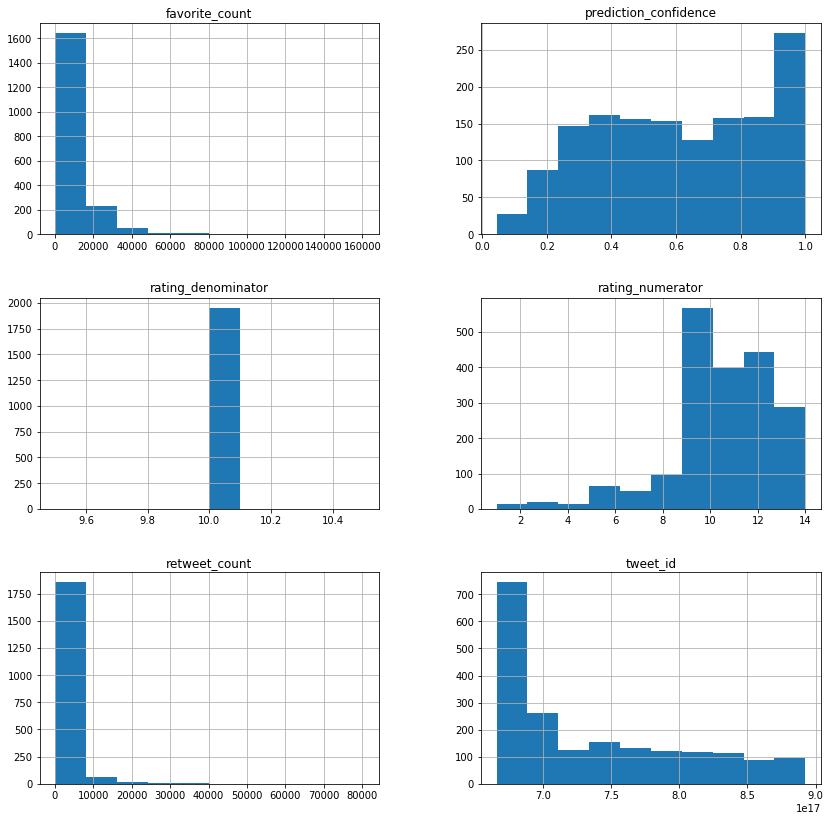

In [132]:
# Plot histograms to have a general look of the distribution of the different numerical data.
tw_combined_clean.hist(figsize = (14,14));

**Observation**
Ratings are skewed right as expected (most ratings are 9 or better).

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=10.0, right=10.0
  'left=%s, right=%s') % (left, right))
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=10.0, top=10.0
  'bottom=%s, top=%s') % (bottom, top))


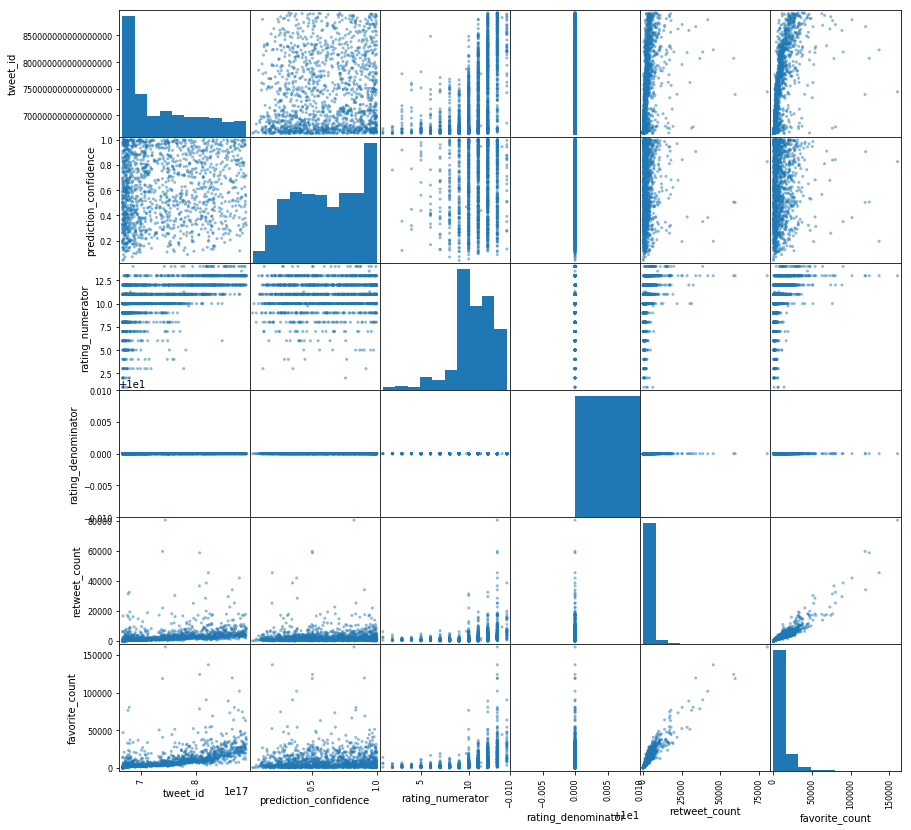

In [133]:
# Next, plot scatter matrices to see any relationships between two variables.
pd.plotting.scatter_matrix(tw_combined_clean, figsize = (14, 14));

**Observation**
We see a positive correlation between the retweet_count and the favorite count, which makes sense given the more retweets the more opportunities for people to view and favorite the original tweet.
The also appears to be a slighltly positive correlation between rating numerator and retweet count and favorite count. 

### Analysis ###  
**Influence of Dog Breed**
* Using the highest confidence prediction (#1), what is the distribution of dog breeds?
* Using the highest confidence prediction (#1), what dog breeds get the highest ratings?
* Using the highest confidence prediction (#1), what dog breeds get the most retweets and favorites?
* Using the highest confidence prediction (#1), do certain dog breeds predictions have higher confidence?

In [134]:
#First let's get a sense of what percentage of records we are actually working with
total_records = tw_combined_clean.shape[0]
dog_breed_predictions = tw_combined_clean[tw_combined_clean.breed_prediction.notna()].shape[0]
ratio = dog_breed_predictions / total_records
'In total there are {} records, for which {} have dog breed predictions, giving a ratio of {}'.\
format(total_records, dog_breed_predictions, ratio)

'In total there are 1953 records, for which 1450 have dog breed predictions, giving a ratio of 0.742447516641065'

In [135]:
# Let's just use the tweets with dog breed predictions for this part of our analysis
tw_combined_clean_preds = tw_combined_clean[tw_combined_clean.breed_prediction.notna()].copy()
tw_combined_clean_preds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 1 to 1952
Data columns (total 13 columns):
tweet_id                 1450 non-null int64
timestamp                1450 non-null datetime64[ns]
source                   1450 non-null category
breed_prediction         1450 non-null object
prediction_confidence    1450 non-null float64
rating_numerator         1450 non-null float64
rating_denominator       1450 non-null int64
name                     1104 non-null object
stage                    227 non-null category
retweet_count            1450 non-null int64
favorite_count           1450 non-null int64
text                     1450 non-null object
expanded_urls            1450 non-null object
dtypes: category(2), datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 139.3+ KB


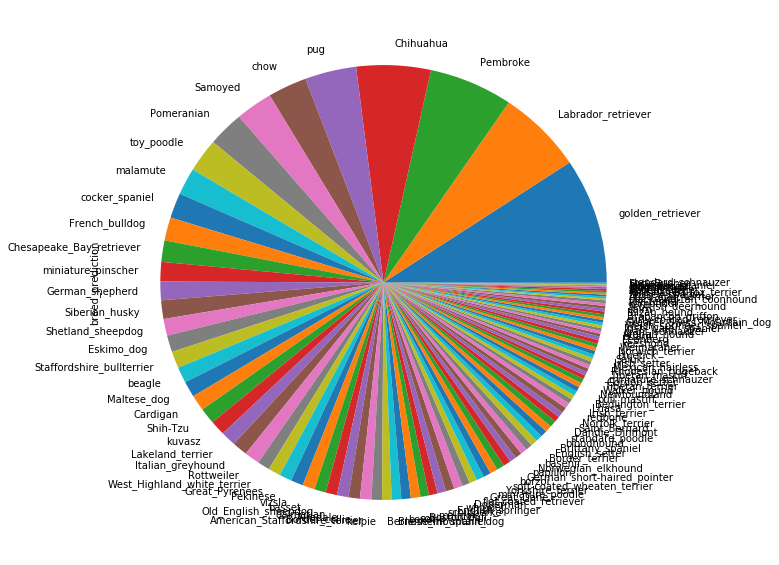

In [136]:
tw_combined_clean_preds.breed_prediction.value_counts().plot.pie(figsize=(10,10));

In [137]:
tw_combined_clean_preds.breed_prediction.value_counts()

# to avoid misrepresentation in remaining analysis, we perhaps should focus on those breeds that have at least 5 or more

golden_retriever               135
Labrador_retriever             90 
Pembroke                       88 
Chihuahua                      78 
pug                            54 
chow                           41 
Samoyed                        39 
Pomeranian                     38 
toy_poodle                     36 
malamute                       29 
cocker_spaniel                 27 
French_bulldog                 25 
Chesapeake_Bay_retriever       23 
miniature_pinscher             21 
German_shepherd                20 
Siberian_husky                 20 
Shetland_sheepdog              18 
Eskimo_dog                     18 
Staffordshire_bullterrier      18 
beagle                         17 
Maltese_dog                    17 
Cardigan                       17 
Shih-Tzu                       17 
kuvasz                         16 
Lakeland_terrier               16 
Italian_greyhound              16 
Rottweiler                     16 
West_Highland_white_terrier    13 
Great_Pyrenees      

In [138]:
# Let's create a new column for breed count
z = tw_combined_clean_preds['breed_prediction'].value_counts() 
z1 = z.to_dict() #converts to dictionary
tw_combined_clean_preds['breed_count'] = tw_combined_clean_preds['breed_prediction'].map(z1) 

tw_combined_clean_preds.head(10)

,tweet_id,timestamp,source,breed_prediction,prediction_confidence,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,text,expanded_urls,breed_count
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,Chihuahua,0.323581,13.0,10,Tilly,NaN,5913,31993,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,78
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,Chihuahua,0.716012,12.0,10,Archie,NaN,3909,24092,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,78
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,basset,0.555712,12.0,10,Franklin,NaN,8799,38741,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",13
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Chesapeake_Bay_retriever,0.425595,13.0,10,NaN,NaN,2926,19473,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,23
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Appenzeller,0.341703,13.0,10,Jax,NaN,1943,11362,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",2
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,Pomeranian,0.566142,13.0,10,NaN,NaN,17745,62752,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",38
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,Irish_terrier,0.487574,13.0,10,Zoey,NaN,4029,26787,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,5
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,Pembroke,0.511319,14.0,10,Cassie,doggo,6933,30686,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,88
10,890006608113172480,2017-07-26 00:31:25,Twitter for iPhone,Samoyed,0.957979,13.0,10,Koda,NaN,6890,29524,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,"https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitter.com/dog_rates/status/890006608113172480/photo/1",39
11,889880896479866881,2017-07-25 16:11:53,Twitter for iPhone,French_bulldog,0.377417,13.0,10,Bruno,NaN,4692,26771,This is Bruno. He is a service shark. Only gets out of the water to assist you. 13/10 terrifyingly good boy https://t.co/u1XPQMl29g,https://twitter.com/dog_rates/status/889880896479866881/photo/1,25


In [139]:
# Let's then create separate dataframe for only analyzing those instances with breed count >= 5
tw_combined_clean_preds2 = tw_combined_clean_preds[tw_combined_clean_preds.breed_count >= 5]

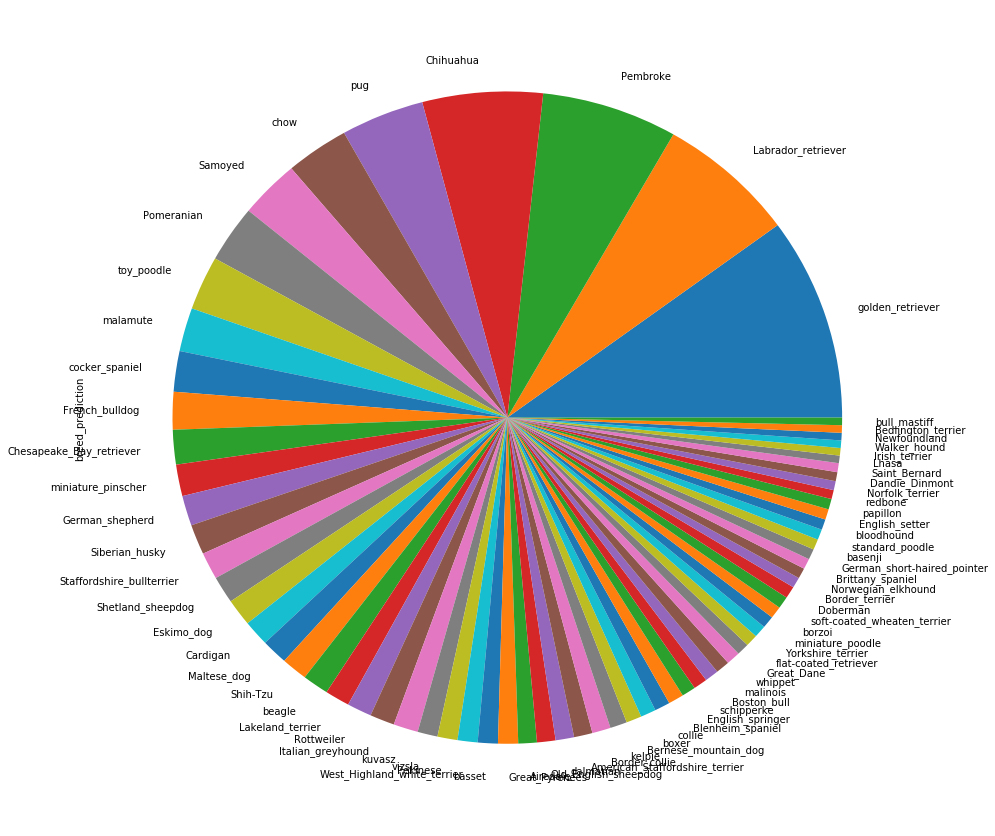

In [140]:
# We can revisit the pie chart as well:
tw_combined_clean_preds2.breed_prediction.value_counts().plot.pie(figsize=(15,15));

Above is a pie chart showing the distribution of dog breeds for those dog breed predictionss that have a sample size of at least 5 tweets.  The top 10 dog breeds from greatest to least are as follows (with tweet count):  
golden_retriever              135  
Labrador_retriever            90   
Pembroke                      88  
Chihuahua                     78  
pug                           54  
chow                          41  
Samoyed                       39  
Pomeranian                    38  
toy_poodle                    36  
malamute                      29  

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=10.0, right=10.0
  'left=%s, right=%s') % (left, right))
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=10.0, top=10.0
  'bottom=%s, top=%s') % (bottom, top))


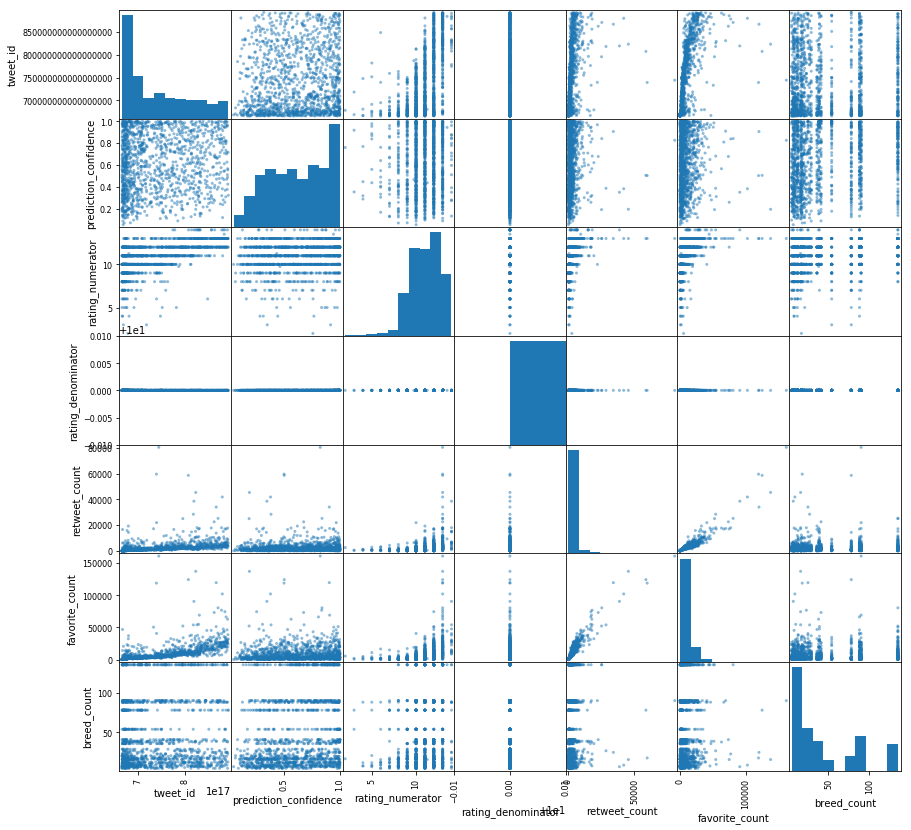

In [141]:
# Let's check for any new correlations between counts per breed and other variables
pd.plotting.scatter_matrix(tw_combined_clean_preds2, figsize = (14, 14));


**Observation**
The scatter matrix shows only a slight correlation between tweeted breed count and rating and no correlation between tweeted breed count and retweet count and favorite count.


In [142]:
# Let's take a look at the dog breeds that have the highest ratings
tw_combined_clean_preds2.groupby('breed_prediction').mean().sort_values(by=['rating_numerator'], ascending=False)[['rating_numerator', 'breed_count']].head(10)

,rating_numerator,breed_count
breed_prediction,,
Border_terrier,12.142857,7.0
Eskimo_dog,11.777778,18.0
Samoyed,11.743590,39.0
golden_retriever,11.625926,135.0
chow,11.609756,41.0
Cardigan,11.529412,17.0
Great_Pyrenees,11.461538,13.0
kelpie,11.454545,11.0
Pembroke,11.443182,88.0


In [143]:
# Let's take a look at the dog breeds that have the highest average favorite counts
tw_combined_clean_preds2.groupby('breed_prediction').mean().sort_values(by=['favorite_count'], ascending=False)[['favorite_count', 'breed_count']].head(10)

,favorite_count,breed_count
breed_prediction,,
French_bulldog,17939.240000,25.0
flat-coated_retriever,15846.250000,8.0
standard_poodle,14922.571429,7.0
English_springer,14761.777778,9.0
Cardigan,14368.411765,17.0
Eskimo_dog,13932.055556,18.0
basset,13069.384615,13.0
Lakeland_terrier,12918.125000,16.0
Great_Pyrenees,12783.307692,13.0


In [144]:
# Lastly let's take a look at the dog breeds with the highest average retweet counts
tw_combined_clean_preds2.groupby('breed_prediction').mean().sort_values(by=['retweet_count'], ascending=False)[['retweet_count', 'breed_count']].head(10)

,retweet_count,breed_count
breed_prediction,,
standard_poodle,6054.857143,7.0
English_springer,5453.444444,9.0
Eskimo_dog,4983.333333,18.0
Great_Pyrenees,4517.000000,13.0
French_bulldog,4424.840000,25.0
Lakeland_terrier,4162.250000,16.0
flat-coated_retriever,4142.625000,8.0
Cardigan,4106.941176,17.0
Samoyed,4088.666667,39.0


**Observations**

The top 10 highest average rated dog breeds from greatest to least are as follows (with average ratings value and tweet count for that breed respectively):  
1.)  Border terrier:  12.14,  7  
2.)  Eskimo dog:  11.78,  18  
3.)  Samoyed:  11.74,  39  
4.)  golden retriever:  11.63,  135  
5.)  chow:  11.61,  41  
6.)  Cardigan:  11.53,  17  
7.)  Great Pyrenees:  11.46,  13  
8.)  kelpie:  11.45,  11  
9.)  Pembroke:  11.44,  88  
10.)  Norfolk terrier:  11.33, 6  
As can be seen, it's not always the the most tweeted dogs that have the highest ratings.  This is as confirmed by the scatter matrix above.


The top 10 dog breeds with the highest average favorite count from greatest to lowest is as follows (with average favorite count and tweeted breed count respectively):  
1.)  French bulldog:  17939.24,  25  
2.)  flat-coated retriever:  15846.25,  8  
3.)  standard poodle:  14922.57,  7  
4.)  English springer:  14761.78,  9  
5.)  Cardigan:  14368.41,  17  
6.)  Eskimo dog:  13932.06,  18  
7.)  basset:  13069.38,  13  
8.)  Lakeland terrier:  12918.13,  16  
9.)  Great Pyrenees:  12783.31,  13  
10.)  Border terrier:  12782.57,  7   

The top 10 dog breeds with the highest average retweet count from greatest to lowest is as follows (with avg retweet count and tweeted breed count respectively):  
1.)  standard poodle:  6054.86,  7  
2.)  English springer:  5453.44,  9  
3.)  Eskimo dog:  4983.33,  18  
4.)  Great Pyrenees:  4517,  13  
5.)  French bulldog:  4424.84,  25  
6.)  Lakeland terrier:  4162.25,  16  
7.)  flat-coated retriever:  4142.63,  8  
8.)  Cardigan:  4106.94,  17  
9.)  Samoyed:  4088.67,  39  
10.)  Labrador retriever:  3536.56,  90  

Dog breeds that show up in all top 10 lists for the highest ratings, tweet counts and favorites include:
Eskimo Dogs, Cardigans, and Great Pyrenees.  So if you're looking for your pet to become a social influencer on twitter, one of these 3 breeds would be ideal!

In [145]:
# Let's take a look at the dog breeds that have the lowest ratings
tw_combined_clean_preds2.groupby('breed_prediction').mean().sort_values(by=['rating_numerator'], ascending=True)[['rating_numerator', 'breed_count']].head(10)

,rating_numerator,breed_count
breed_prediction,,
soft-coated_wheaten_terrier,8.250000,8.0
Walker_hound,9.000000,5.0
dalmatian,9.333333,12.0
Boston_bull,9.444444,9.0
Maltese_dog,9.764706,17.0
Airedale,9.833333,12.0
Saint_Bernard,9.833333,6.0
English_setter,9.857143,7.0
miniature_poodle,9.875000,8.0


In [146]:
# Let's take a look at the dog breeds that have the lowest average favorite counts 
tw_combined_clean_preds2.groupby('breed_prediction').mean().sort_values(by=['favorite_count'], ascending=True)[['favorite_count', 'breed_count']].head(10)

,favorite_count,breed_count
breed_prediction,,
soft-coated_wheaten_terrier,1901.250000,8.0
Lhasa,2485.600000,5.0
basenji,2513.571429,7.0
Maltese_dog,2930.529412,17.0
redbone,3076.500000,6.0
Dandie_Dinmont,3228.500000,6.0
miniature_poodle,3236.125000,8.0
Shih-Tzu,3586.705882,17.0
malinois,3886.222222,9.0


In [147]:
# Lastly we'll look at the dog breeds that have the lowest average retweet counts
tw_combined_clean_preds2.groupby('breed_prediction').mean().sort_values(by=['retweet_count'], ascending=True)[['retweet_count', 'breed_count']].head(10)

,retweet_count,breed_count
breed_prediction,,
soft-coated_wheaten_terrier,668.750000,8.0
Lhasa,749.400000,5.0
basenji,856.000000,7.0
miniature_poodle,883.250000,8.0
Dandie_Dinmont,930.833333,6.0
redbone,1008.333333,6.0
malinois,1099.555556,9.0
papillon,1173.714286,7.0
Maltese_dog,1196.823529,17.0


**Observations**

The bottom 10 dog breeds with the lowest ratings (from lowest to highest) are as follows (with average ratings and tweet count per breed respectively):  
1.)  soft-coated wheaten terrier:  8.25,  8  
2.)  Walker hound:  9,  5  
3.)  dalmatian:  9.33,  12  
4.)  Boston bull:  9.44,  9  
5.)  Maltese dog:  9.76,  17  
6.)  Airedale:  9.83,  12  
7.)  Saint Bernard:  9.83,  6  
8.)  English setter:  9.86,  7  
9.)  miniature poodle:  9.88,  8  
10.)  Italian greyhound:  9.94,  16     


The bottom 10 breeds as far as the lowest average favorite counts are as follows (with avg favorite count and tweeted breed count respectively):  
1.)  soft-coated wheaten terrier:  1901.25,  8  
2.)  Lhasa:  2485.6,  5  
3.)  basenji:  2513.57,  7  
4.)  Maltese dog:  2930.53,  17  
5.)  redbone:  3076.5,  6  
6.)  Dandie Dinmont:  3228.5,  6  
7.)  miniature poodle:  3236.13,  8  
8.)  Shih-Tzu:  3586.71,  17  
9.)  malinois:  3886.22,  9  
10.)  papillon:  4111.43,  7  

The bottom 10 dog breeds as far as the lowest average retweet count are as follows (with avg retweet count and tweet breed count respectively):  
1.)  soft-coated wheaten terrier:  668.75,  8  
2.)  Lhasa:  749.4,  5  
3.)  basenji:  856,  7  
4.)  miniature poodle:  883.25,  8  
5.)  Dandie Dinmont:  930.83,  6  
6.)  redbone:  1008.33,  6  
7.)  malinois:  1099.56,  9  
8.)  papillon:  1173.71,  7  
9.)  Maltese dog:  1196.82,  17  
10.)  Saint Bernard:  1224,  6   

There are 3 dog breeds that show up in the bottom ten list for rating, favorite count and retweet count:
Soft-coated Wheaten Terrier, Maltese dog, and Miniature Poodle with the Soft-coated Wheaten Terrier being the lowest in all three categories -- no love for the Soft-coated Wheaten Terrier!  Then again, these breeds didn't have a large sample size (each less than 20 tweets and 2 of the breeds less than 10) so perhaps this is not a true representation.

We'll now illustrate the above observations in chart format below

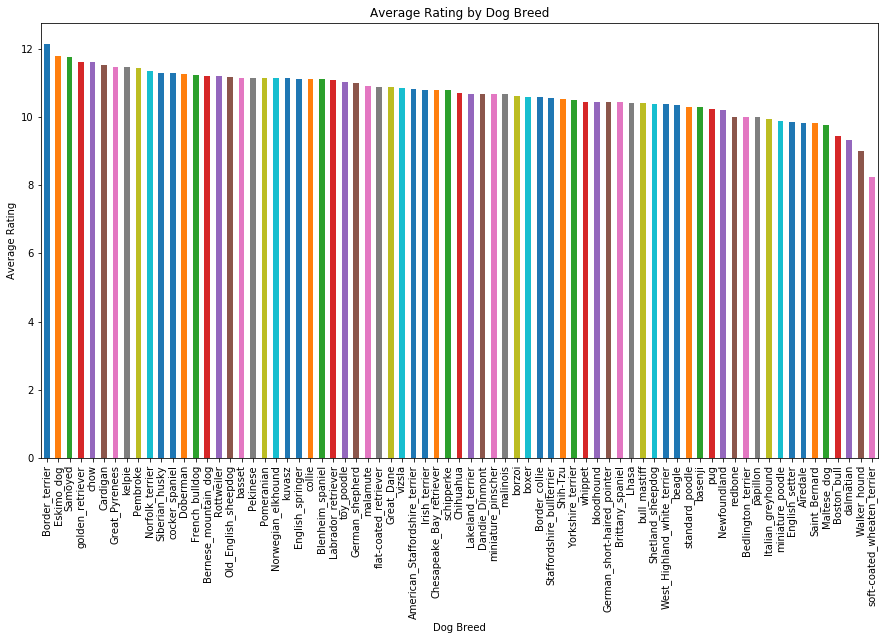

In [148]:
# Let's illustrate these observations in charts: Dog Breed vs Rating
tw_combined_clean_preds2.groupby('breed_prediction').mean().sort_values(by=['rating_numerator'], ascending=False)['rating_numerator'].plot(kind='bar', figsize=(15,8), title='Average Rating by Dog Breed');
plt.pyplot.ylabel('Average Rating')
plt.pyplot.xlabel('Dog Breed');

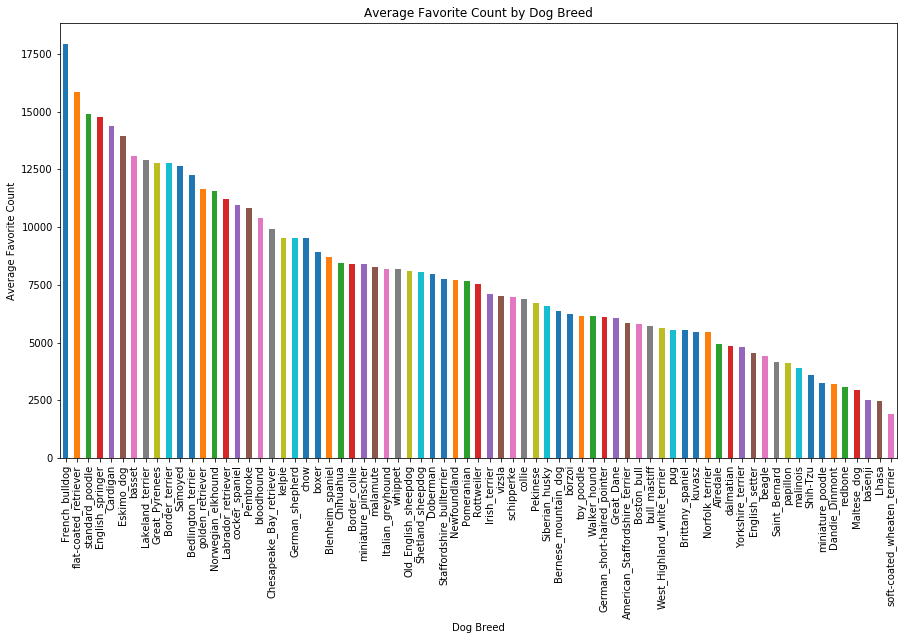

In [149]:
# Dog Breed vs Average Favorite Count
tw_combined_clean_preds2.groupby('breed_prediction').mean().sort_values(by=['favorite_count'], ascending=False)['favorite_count'].plot(kind='bar', figsize=(15,8), title='Average Favorite Count by Dog Breed');
plt.pyplot.ylabel('Average Favorite Count')
plt.pyplot.xlabel('Dog Breed');

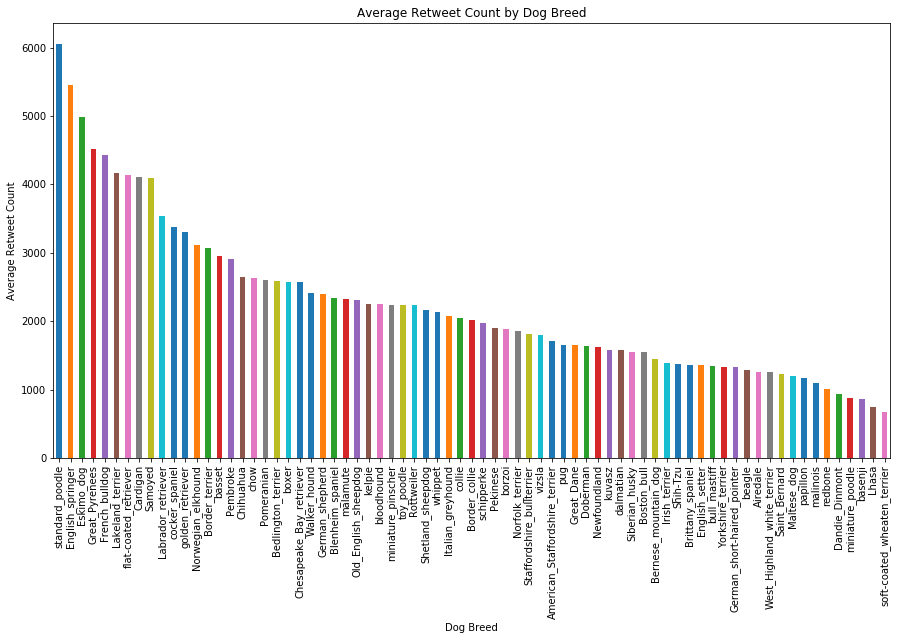

In [150]:
# Dog Breed vs Average Retweet Count
tw_combined_clean_preds2.groupby('breed_prediction').mean().sort_values(by=['retweet_count'], ascending=False)['retweet_count'].plot(kind='bar', figsize=(15,8), title='Average Retweet Count by Dog Breed');
plt.pyplot.ylabel('Average Retweet Count')
plt.pyplot.xlabel('Dog Breed');

In [151]:
# Lastly, let's see which dog breeds have the highest prediction confidence
tw_combined_clean_preds2.groupby('breed_prediction').mean().sort_values(by=['prediction_confidence'], ascending=False)[['prediction_confidence', 'breed_count']].head(10)

,prediction_confidence,breed_count
breed_prediction,,
Brittany_spaniel,0.874545,7.0
bull_mastiff,0.815618,5.0
Bernese_mountain_dog,0.801816,10.0
French_bulldog,0.777413,25.0
pug,0.759223,54.0
Pomeranian,0.743606,38.0
Samoyed,0.740719,39.0
German_short-haired_pointer,0.732425,7.0
golden_retriever,0.725667,135.0


In [152]:
# Conversely, let's see which dog breeds have the lowest (and worst) prediction confidence
tw_combined_clean_preds2.groupby('breed_prediction').mean().sort_values(by=['prediction_confidence'], ascending=True)[['prediction_confidence', 'breed_count']].head(10)

,prediction_confidence,breed_count
breed_prediction,,
Norfolk_terrier,0.271724,6.0
Bedlington_terrier,0.340243,5.0
kelpie,0.399746,11.0
standard_poodle,0.400222,7.0
Dandie_Dinmont,0.413791,6.0
soft-coated_wheaten_terrier,0.419200,8.0
Walker_hound,0.424219,5.0
Lhasa,0.428304,5.0
Italian_greyhound,0.433529,16.0


**Observations**  
The predicted dog breeds with the 10 highest prediction confidence ratings are as follows from greatest to lowest(with average prediction confidence and tweet breed count respectively):  
1.)  Brittany_spaniel:  0.87,  7  
2.)  bull_mastiff:  0.82,  5  
3.)  Bernese_mountain_dog:  0.8,  10  
4.)  French_bulldog:  0.78,  25  
5.)  pug:  0.76,  54  
6.)  Pomeranian:  0.74,  38  
7.)  Samoyed:  0.74,  39  
8.)  German_short-haired_pointer:  0.73,  7  
9.)  golden_retriever:  0.73,  135  
10.)  Doberman:  0.72,  8  

Conversely the predicted dog breeds with the 10 lowest prediction confidence ratings are as follows from lowest to greatest (with average prediction confidence and tweet breed count respectively):  
1.)  Norfolk_terrier:  0.27,  6  
2.)  Bedlington_terrier:  0.34,  5  
3.)  kelpie:  0.4,  11  
4.)  standard_poodle:  0.4,  7  
5.)  Dandie_Dinmont:  0.41,  6  
6.)  soft-coated_wheaten_terrier:  0.42,  8  
7.)  Walker_hound:  0.42,  5  
8.)  Lhasa:  0.43,  5  
9.)  Italian_greyhound:  0.43,  16  
10.)  kuvasz:  0.44,  16  

It would be interesting to learn more about what makes certain dog breeds harder to predict.  Below is a chart representation of this same information


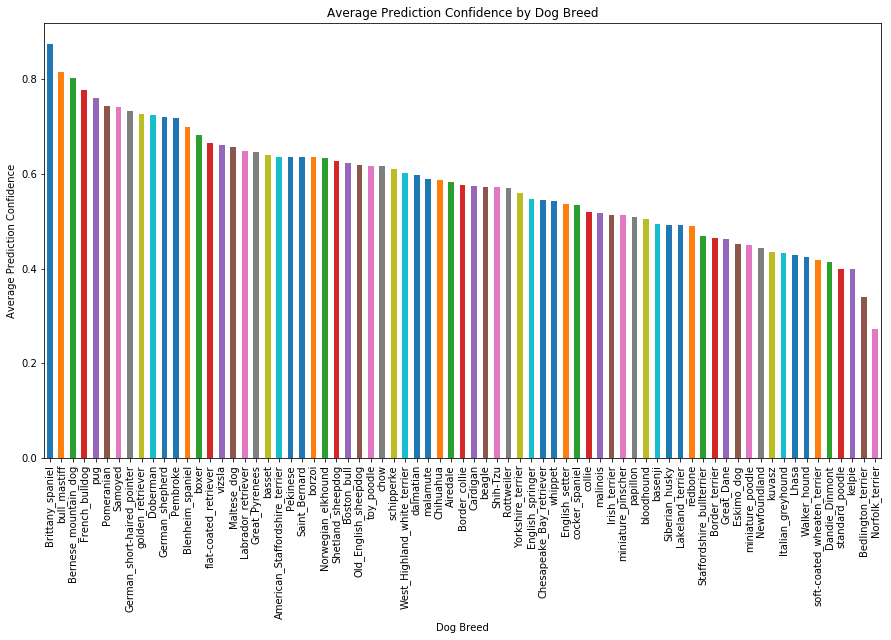

In [153]:
tw_combined_clean_preds2.groupby('breed_prediction').mean().sort_values(by=['prediction_confidence'], ascending=False)['prediction_confidence'].plot(kind='bar', figsize=(15,8), title='Average Prediction Confidence by Dog Breed');
plt.pyplot.ylabel('Average Prediction Confidence')
plt.pyplot.xlabel('Dog Breed');

### Analysis ###  
**Influence of Dog Stage**
* What is the distribution of dog stage?
* Which dog stage gets the highest ratings?
* Which dog stage gets the most retweets and favorites?

In [154]:
#First let's get a sense of what percentage of records we are actually working with
total_records = tw_combined_clean.shape[0]
dog_stages = tw_combined_clean[tw_combined_clean.stage.notna()].shape[0]
ratio = dog_stages / total_records
'In total there are {} records, for which {} have dog breed predictions, giving a ratio of {}'.\
format(total_records, dog_stages, ratio)

'In total there are 1953 records, for which 303 have dog breed predictions, giving a ratio of 0.15514592933947774'

**Observation**  
For this analysis we'll only be working with about 15.5% of the total tweet archive post cleaning.  Hence, this analysis may not be that insightful as the sample size relative to the larger population is rather small.  Take the following observations with a grain of salt!

In [155]:
# Let's just use the tweets with dog stages for this part of our analysis
tw_combined_clean_stages = tw_combined_clean[tw_combined_clean.stage.notna()].copy()
tw_combined_clean_stages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 9 to 1623
Data columns (total 13 columns):
tweet_id                 303 non-null int64
timestamp                303 non-null datetime64[ns]
source                   303 non-null category
breed_prediction         227 non-null object
prediction_confidence    227 non-null float64
rating_numerator         303 non-null float64
rating_denominator       303 non-null int64
name                     188 non-null object
stage                    303 non-null category
retweet_count            303 non-null int64
favorite_count           303 non-null int64
text                     303 non-null object
expanded_urls            303 non-null object
dtypes: category(2), datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 29.6+ KB


In [156]:
# Let's review the distribution of tweets by dog stage
tw_combined_clean_stages.stage.value_counts()

pupper          201
doggo           62 
puppo           22 
doggopupper     9  
floofer         7  
doggopuppo      1  
doggofloofer    1  
Name: stage, dtype: int64

**Observation**  
It appears the pupper dog stage has the most tweets by a large margin (201 tweets) followed next by doggo (62 tweets) with puppo having 22 tweets and floofer only having 7.

In [157]:
# For our analysis let's remove those instances of in-between dog stages:
hybrid_stages = ['doggofloofer', 'doggopuppo', 'doggopupper']
#hybrid_stages
tw_combined_clean_stages.drop(tw_combined_clean_stages[tw_combined_clean_stages['stage'].isin(hybrid_stages)].index, inplace=True)
tw_combined_clean_stages.reset_index(drop=True, inplace=True)

In [158]:
# Let's review the influence of dog stage on rating
tw_combined_clean_stages.groupby('stage').mean().sort_values(by=['rating_numerator'], ascending=False)['rating_numerator']

stage
floofer         12.000000
puppo           12.000000
doggo           11.870968
pupper          10.638159
doggofloofer   NaN       
doggopupper    NaN       
doggopuppo     NaN       
Name: rating_numerator, dtype: float64

In [159]:
# Let's review the influence of dog stage on favorite count
tw_combined_clean_stages.groupby('stage').mean().sort_values(by=['favorite_count'], ascending=False)['favorite_count']

stage
puppo           21308.863636
doggo           19391.758065
floofer         12391.142857
pupper          6900.950249 
doggofloofer   NaN          
doggopupper    NaN          
doggopuppo     NaN          
Name: favorite_count, dtype: float64

In [160]:
# Let's review the influence of dog stage on retweet count
tw_combined_clean_stages.groupby('stage').mean().sort_values(by=['retweet_count'], ascending=False)['retweet_count']

stage
doggo           6747.241935
puppo           6015.863636
floofer         4500.285714
pupper          2176.716418
doggofloofer   NaN         
doggopupper    NaN         
doggopuppo     NaN         
Name: retweet_count, dtype: float64

**Observations**
The puppo dog stage consistently ranks in the top 2 as far as average rating, favorite count and retweet count.  The pupper dog stage consistenly ranks at the bottom as far as average rating, favorite count and retweet count -- this could be attributed to the fact that pupper stage has the largest sample size and hence the scores are averaged out better.

### Analysis ###  
**Influence of Tweet Source**
* What is the distribution of sources for tweets? (which source has the most tweets?)
* Do certain sources get more retweets and favorites on average?

In [161]:
# Let's review the distribution of scoures for tweets
tw_combined_clean.source.value_counts()

Twitter for iPhone                                                 1916
Twitter Web Client                                                 28  
TweetDeck                                                          9   
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>    0   
Name: source, dtype: int64

In [162]:
# Let's review the distribution as a percentage
# Recall, during our cleaning process the tweets sourced from Vine were all retweets hence they were removed
tw_combined_clean.source.value_counts() / tw_combined_clean.shape[0]

Twitter for iPhone                                                 0.981055
Twitter Web Client                                                 0.014337
TweetDeck                                                          0.004608
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>    0.000000
Name: source, dtype: float64

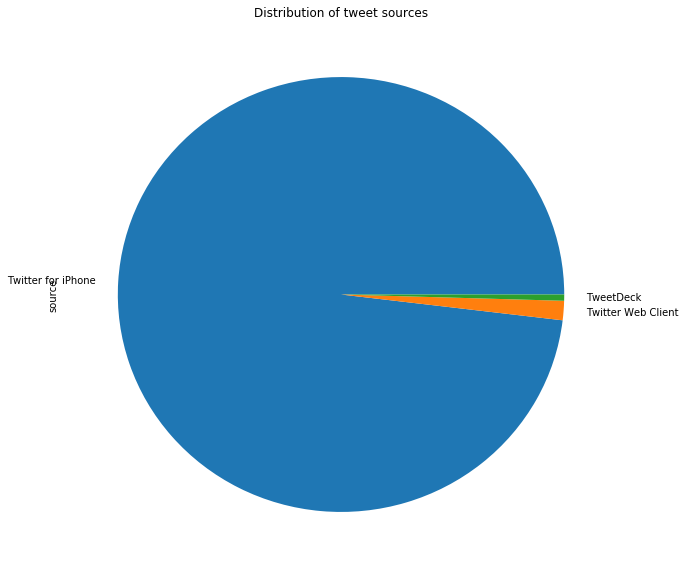

In [163]:
# Let's illustrate this distrubtion using a pie chart
tw_combined_clean.source.value_counts().plot.pie(figsize=(10,10), title = 'Distribution of tweet sources');
#tw_combined_clean_preds2.breed_prediction.value_counts().plot.pie(figsize=(15,15));

**Observations**
* Tweets sourced from Iphones made up the vast majority of tweets (98.1%), with the remainder coming from Twitter's web client (1.4%) and only .46% coming from Twitter's TweetDeck.

In [164]:
tw_combined_clean_stages.groupby('source').mean().sort_values(by=['rating_numerator'], ascending=False)['rating_numerator']

source
Twitter Web Client                                                 13.000000
Twitter for iPhone                                                 11.028616
TweetDeck                                                          11.000000
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>   NaN       
Name: rating_numerator, dtype: float64

In [165]:
tw_combined_clean_stages.groupby('source').mean().sort_values(by=['favorite_count'], ascending=False)['favorite_count']

source
Twitter for iPhone                                                 10834.553633
Twitter Web Client                                                 6737.000000 
TweetDeck                                                          3495.000000 
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>   NaN          
Name: favorite_count, dtype: float64

In [166]:
tw_combined_clean_stages.groupby('source').mean().sort_values(by=['retweet_count'], ascending=False)['retweet_count']

source
Twitter for iPhone                                                 3516.228374
TweetDeck                                                          1174.500000
Twitter Web Client                                                 1161.000000
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>   NaN         
Name: retweet_count, dtype: float64

**Observation**
Meanwhile, tweets from Iphone get the highest average favorite and retweet count, but tweets from Twitter's web client get the highest average ratings (with tweets from Iphone getting second average highest ratings).  Note however, that given the very small sample size for tweets from sources other than Iphones, it's probably not a very accurate analysis.

### Analysis ###  
**Influence of Time and Day**
* Are there certain times of the day and days of the week that posting a tweet will get more retweets and favorites?

In [167]:
#Let's start with adding some metadata columns for day of the week and time of day

In [168]:
tw_combined_clean['day_of_week'] = tw_combined_clean.timestamp.dt.day_name()

In [169]:
tw_combined_clean['hour'] = tw_combined_clean.timestamp.dt.hour

In [170]:
tw_combined_clean.head()

,tweet_id,timestamp,source,breed_prediction,prediction_confidence,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,text,expanded_urls,day_of_week,hour
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,NaN,NaN,13.0,10,Phineas,NaN,7966,37191,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Tuesday,16
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,Chihuahua,0.323581,13.0,10,Tilly,NaN,5913,31993,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tuesday,0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,Chihuahua,0.716012,12.0,10,Archie,NaN,3909,24092,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Monday,0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,NaN,NaN,13.0,10,Darla,NaN,8115,40511,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Sunday,15
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,basset,0.555712,12.0,10,Franklin,NaN,8799,38741,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Saturday,16


In [171]:
tw_combined_clean.day_of_week.value_counts()

Monday       323
Tuesday      291
Wednesday    290
Thursday     276
Friday       275
Sunday       250
Saturday     248
Name: day_of_week, dtype: int64

In [172]:
# The distribution looks to be somewhat even across the week, with Monday's having the most tweets and the weekends the least
# Now let's see if certain days get higher ratings
tw_combined_clean.groupby('day_of_week').mean().sort_values(by=['rating_numerator'], ascending=False)['rating_numerator']

day_of_week
Friday       10.739127
Thursday     10.691123
Tuesday      10.609175
Saturday     10.586694
Sunday       10.448000
Wednesday    10.420690
Monday       10.386997
Name: rating_numerator, dtype: float64

In [173]:
# We'll do the same analysis for favorite count
tw_combined_clean.groupby('day_of_week').mean().sort_values(by=['favorite_count'], ascending=False)['favorite_count']

day_of_week
Wednesday    9356.551724
Saturday     8911.657258
Tuesday      8829.690722
Sunday       8381.972000
Friday       8290.821818
Monday       8155.356037
Thursday     7760.695652
Name: favorite_count, dtype: float64

In [174]:
# Finally, we'll do the same analysis for retweet count
tw_combined_clean.groupby('day_of_week').mean().sort_values(by=['retweet_count'], ascending=False)['retweet_count']

day_of_week
Saturday     2803.504032
Wednesday    2798.955172
Friday       2544.698182
Tuesday      2532.663230
Sunday       2451.892000
Monday       2424.402477
Thursday     2254.590580
Name: retweet_count, dtype: float64

**Observations**
There doesn't appear to be clear winner as far as which day to post to get the highest average rating, retweet count and favorite count.  Posting on Fridays appears to have slightly higher ratings, but lower average favorites and retweets.  That said, posting on Mondays and Thursdays does appear to result in the least average favorites and retweet counts.

In [175]:
# Let's now look at the time of day.  We'll first observe the distribution across the day
tw_combined_clean.hour.value_counts()

1     272
0     248
2     206
16    187
3     166
17    157
23    108
18    98 
4     94 
15    89 
19    81 
20    75 
21    69 
22    67 
5     24 
14    8  
6     3  
13    1  
Name: hour, dtype: int64

In [176]:
# There appear to be very few tweets at 2pm, 6am and 1pm.  Let's instead look at times of day:
# 12am - 6am will be considered twilight
# 6am - 12pm will be considered morning
# 12pm - 6pm will be considered afternoon
# 6pm - 12am will be considered evening

In [182]:
tw_combined_clean['time_of_day'] = pd.Series()
tw_combined_clean.loc[tw_combined_clean.hour < 6, 'time_of_day'] = 'twilight'
tw_combined_clean.loc[(tw_combined_clean.hour >= 6) & (tw_combined_clean.hour < 12), 'time_of_day'] = 'morning'
tw_combined_clean.loc[(tw_combined_clean.hour >= 12) & (tw_combined_clean.hour < 18), 'time_of_day'] = 'afternoon'
tw_combined_clean.loc[(tw_combined_clean.hour >= 18) & (tw_combined_clean.hour <= 23 ), 'time_of_day'] = 'evening'
tw_combined_clean.time_of_day.value_counts()

twilight     1010
evening      498 
afternoon    442 
morning      3   
Name: time_of_day, dtype: int64

In [183]:
# Now let's see if certain times of the day get higher ratings
tw_combined_clean.groupby('time_of_day').mean().sort_values(by=['rating_numerator'], ascending=False)['rating_numerator']

time_of_day
morning      12.000000
afternoon    11.113122
evening      10.574317
twilight     10.288881
Name: rating_numerator, dtype: float64

In [184]:
# We'll do the same analysis for favorite count
tw_combined_clean.groupby('time_of_day').mean().sort_values(by=['favorite_count'], ascending=False)['favorite_count']

time_of_day
morning      43681.000000
afternoon    10811.255656
evening      8567.391566 
twilight     7394.408911 
Name: favorite_count, dtype: float64

In [185]:
# Finally, we'll do the same analysis for retweet count
tw_combined_clean.groupby('time_of_day').mean().sort_values(by=['retweet_count'], ascending=False)['retweet_count']

time_of_day
morning      20329.666667
afternoon    2899.776018 
evening      2810.742972 
twilight     2197.668317 
Name: retweet_count, dtype: float64

**Observations**  
If we consider twilight as night time, then it appears the earlier in the day a post is tweeted, the higher the average ratings, retweets and favorite counts.   This makes sense especially for retweet and favorite counts, as it gives more opportunity for people to view your tweet throughout the day.  So in this case, the early bird really does get the worm!   
The irony however, is that the distribution for which tweets are actually posted are in reverse with the majority of tweets (57%) happening latest in the evening (twilight) and the least tweets occuring in the morning (~.15%), then afternoon (22%) etc.  This is likely because people are too busy working during the day to tweet (although not busy enough to view other people's tweets).  This is illustrated in the pie chart below

In [187]:
#tw_combined_clean.sample(15)
tw_combined_clean.time_of_day.value_counts() / tw_combined_clean.shape[0]
#tw_combined_clean.source.value_counts() / tw_combined_clean.shape[0]

twilight     0.517153
evening      0.254992
afternoon    0.226318
morning      0.001536
Name: time_of_day, dtype: float64

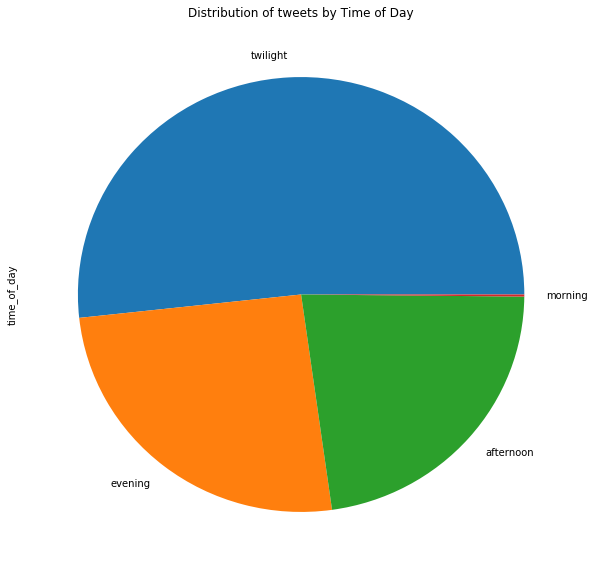

In [191]:
tw_combined_clean.time_of_day.value_counts().plot.pie(figsize=(10,10), title = 'Distribution of tweets by Time of Day');